# UPSAMPLING QUASARS
We want to produce new data of the redshifts of quasars following the distribution measured by the SDSS. We plot know the distribution we would like to reproduce:

In [1]:
import numpy as np
import scipy.stats as stats
import scipy.optimize as opt
import matplotlib.pyplot as plt
from tqdm import tqdm
from astroML.datasets import fetch_dr7_quasar

[0.0802     0.186866   0.29353198 0.40019798 0.50686401 0.61352998
 0.72019601 0.82686198 0.93352795 1.04019392 1.14686    1.25352597
 1.36019194 1.46685791 1.573524   1.68018997 1.78685594 1.8935219
 2.00018787 2.10685396 2.21352005 2.3201859  2.42685199 2.53351784
 2.64018393 2.74685001 2.85351586 2.96018195 3.0668478  3.17351389
 3.28017998 3.38684583 3.49351192 3.600178   3.70684385 3.81350994
 3.92017579 4.02684164 4.13350773 4.24017382 4.3468399  4.45350599
 4.56017208 4.66683769 4.77350378 4.88016987 4.98683596 5.09350204
 5.20016766 5.30683374 5.41349983]
[0.01875012 0.07593799 0.21187633 0.29343926 0.30937702 0.36000215
 0.37593996 0.34500226 0.45375297 0.44343991 0.52312842 0.57000373
 0.52219092 0.57750313 0.56437869 0.52594094 0.51656588 0.35531482
 0.36093946 0.33656433 0.26812705 0.22406372 0.195939   0.15375083
 0.1471883  0.12281344 0.09750053 0.07406307 0.06281284 0.05906282
 0.04218782 0.02343763 0.02062511 0.03000023 0.02625014 0.00843756
 0.02156267 0.01125006 0.018

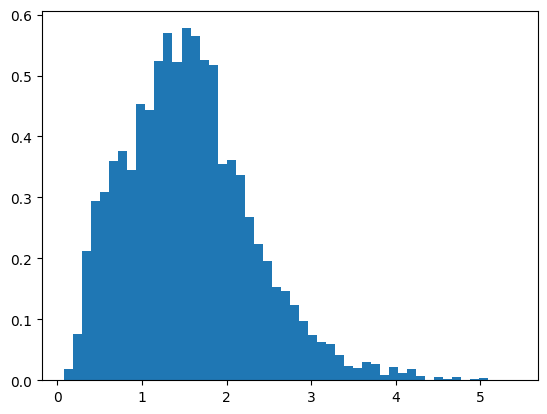

In [8]:
data = fetch_dr7_quasar()[0:10000]
red = data['redshift']

info_hist = plt.hist(red, bins=50, density=True)
bars = info_hist[0]
xbins = info_hist[1]
print(xbins)
print(bars)

We are going to implement two strategies to do this.

## Rejection method
We now implemet the Rejection method to extract data following the distribution of the redshifts of the quasars.

In [9]:
N_upsample = 100000

distrUx = stats.uniform(np.min(xbins), np.max(xbins) - np.min(xbins))
distrUy = stats.uniform(0, np.max(bars))

upsample_r = np.zeros(N_upsample)

for i in tqdm(range (0, N_upsample)):
    flag = True
    while flag:
        x = distrUx.rvs()
        y = distrUy.rvs()
        for j in range(0, len(bars)):
            if ((x >= xbins[j] and x <= xbins[j+1]) and y <= bars[j]):
                upsample_r[i] = x
                flag = False
                break

100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:08<00:00, 11182.25it/s]


And now we plot the new data over the old ones to see the correspondence:

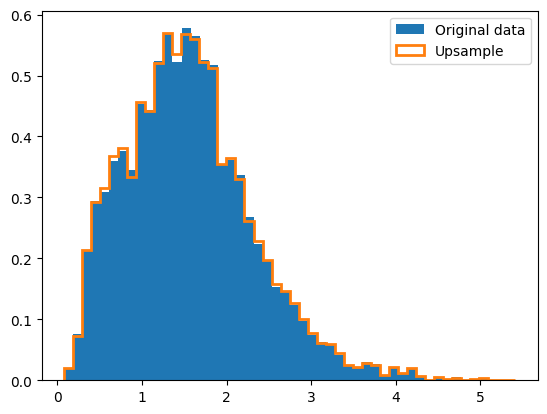

In [10]:
plt.hist(red, bins = 50, density=True, label='Original data')
style={'linewidth':2}
plt.hist(upsample_r, bins=50, density=True, histtype='step', label='Upsample', **style)
plt.legend()

We can see, at least qualitatively, the correspondence among the data we had before and the data produced.
## Inverse method
We instead implement now the Inverse method to upsample the distribution

In [11]:
cdf = stats.ecdf(red).cdf

xx = stats.uniform.rvs(0, 1, 100000)
upsample_i = [opt.brentq(lambda s: (cdf.evaluate(s)-e), np.min(xbins) - 0.0001, np.max(xbins)) for e in tqdm(xx)]

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [00:41<00:00, 2436.45it/s]


And now we plot the new data over the old ones to see the correspondence:

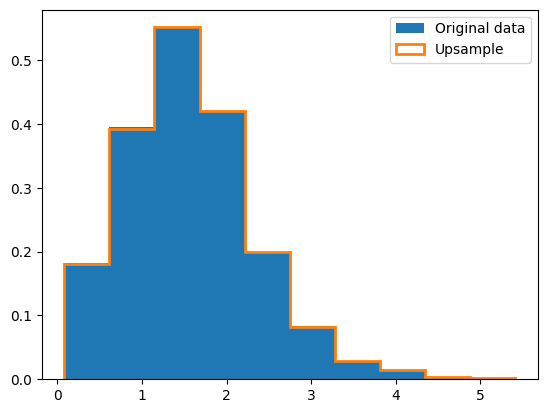

In [7]:
plt.hist(red, bins = 10, density=True, label='Original data')
style={'linewidth':2}
plt.hist(upsample_i, bins=10, density=True, histtype='step', label='Upsample', **style)
plt.legend()

We can see, at least qualitatively, the correspondence among the data we had before and the data produced.